In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [22]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [23]:
img_width = 180
img_height = 180

In [24]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [25]:
data_cat = data_train.class_names

In [26]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [27]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path, 
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [28]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 359 files belonging to 36 classes.


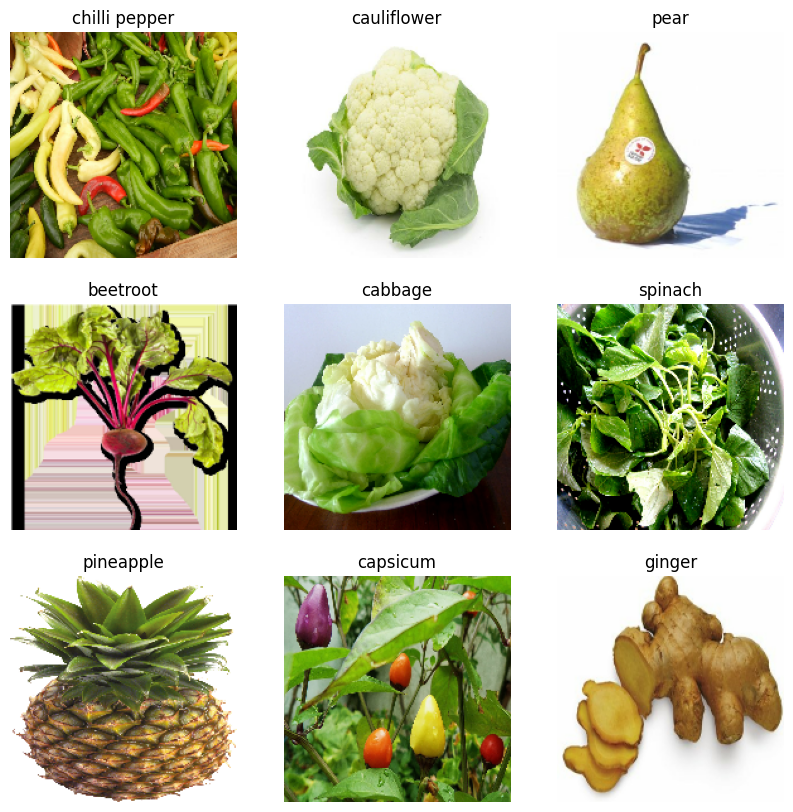

In [29]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range (9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [33]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [34]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - accuracy: 0.0781 - loss: 3.7900 - val_accuracy: 0.3105 - val_loss: 2.3122
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.2813 - loss: 2.5196 - val_accuracy: 0.6154 - val_loss: 1.5057
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.4353 - loss: 1.9268 - val_accuracy: 0.7721 - val_loss: 1.0187
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.5736 - loss: 1.4686 - val_accuracy: 0.8632 - val_loss: 0.6279
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.7050 - loss: 0.9546 - val_accuracy: 0.8946 - val_loss: 0.4428
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.8306 - loss: 0.5832 - val_accuracy: 0.9202 - val_loss: 0.3238
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.8956 - loss: 0.3721 - val_accuracy: 0.9345 - val_loss: 0.2633
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.9379 - loss: 0.2660 - val_accu

Text(0.5, 1.0, 'Loss')

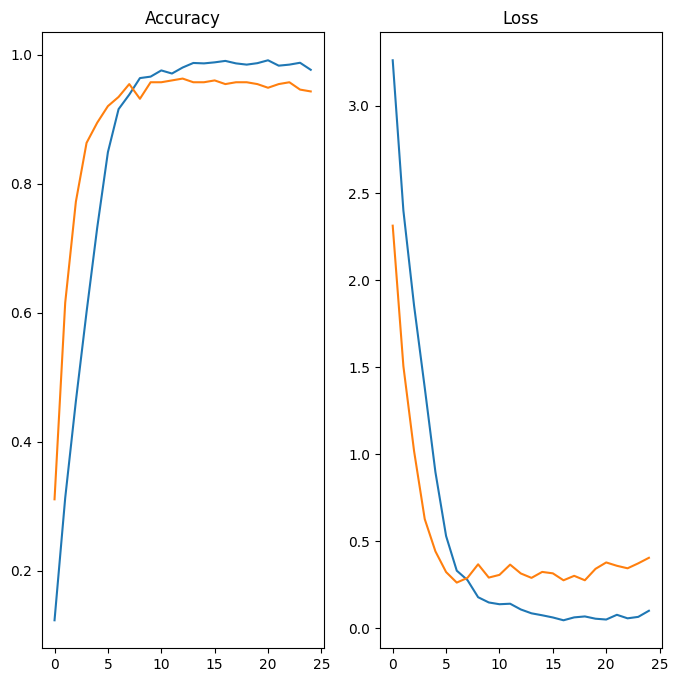

In [35]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [36]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
image_arr = tf.keras.utils.array_to_img(image)
image_bat = tf.expand_dims(image_arr, 0)

In [37]:
predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [38]:
score = tf.nn.softmax(predict)

In [39]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.84


In [40]:
model.save('Image_classify.keras')